#                                                               Esercitazione 7-8
## 4 e 18 Aprile 2023

In [2]:
import numpy as np
import scipy as sp
from scipy.linalg import lu

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,U,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

In [3]:

A=np.array([[2,1],[3,4]])
PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.T.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
#LU è la fattorizzazione di P*A (terorema 2)
A1=P@A # equivale al prodotto matrice x matrice np.dot(P,A)
A1Fatt=L@U # equivale a np.dot(L,U)
print("Matrice P*A \n", A1)
print("Matrice ottenuta moltipicando Le ed U \n",A1Fatt)


A= [[2 1]
 [3 4]]
L= [[1.         0.        ]
 [0.66666667 1.        ]]
U= [[ 3.          4.        ]
 [ 0.         -1.66666667]]
P= [[0. 1.]
 [1. 0.]]
Matrice P*A 
 [[3. 4.]
 [2. 1.]]
Matrice ottenuta moltipicando Le ed U 
 [[3. 4.]
 [2. 1.]]


## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice simmetrica in input non è  definita positiva, restituisce un errore.

In [4]:
from scipy.linalg import cholesky
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
print(A)

[[ 2  1  3]
 [ 1  5  7]
 [ 3  7 12]]


In [5]:
L=cholesky(A,lower=True)
print(L)
A1=L@L.T
print("A1=\n",A1)

[[1.41421356 0.         0.        ]
 [0.70710678 2.12132034 0.        ]
 [2.12132034 2.59272486 0.8819171 ]]
A1=
 [[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

In [6]:
from scipy.linalg import qr
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
Q,R=qr(A)
print("Q= \n",Q)
print("R= \n",R)
A1=Q@R
print(A1)

Q= 
 [[-0.53452248  0.6882472  -0.49051147]
 [-0.26726124 -0.6882472  -0.67445327]
 [-0.80178373 -0.22941573  0.55182541]]
R= 
 [[ -3.74165739  -7.48331477 -13.09580085]
 [  0.          -4.35889894  -5.50597761]
 [  0.           0.           0.42919754]]
[[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


In [7]:
import numpy as np
import scipy as sp
import scipy.linalg as spl
import numpy.linalg as npl
import matplotlib.pyplot as plt

## Esercizio 1. 
Facendo uso dei numpy array, implementare una funzione Lsolve(L,b), che, presa  in input una matrice L, triangolare inferiore,  e il vettore termine noto b, risolva il sistema lineare Lx=b, con il metodo della sostituzione in avanti e restituisca in output: la soluzione del sistema lineare ed un flag: flag=  0, se sono soddisfatti i criteri di applicabilità flag= 1, se non sono soddisfatti. (NB. Come test di applicabilità controllare che la matrice L sia quadrata e che non si annulli nessun elemento della diagonale).

In [8]:
def Lsolve(L, b):
    m, n = L.shape
    flag = 0
    x = []
    
    #matrice non quadrata
    if m != n:
        flag = 1
        return x, flag
    
    #matrice con elementi nulli sulla diagonale
    if np.all(np.diag(L)) != True:
        flag = 1
        return x, flag

    #matrice OK
    x = np.zeros((n, 1))
    for i in range(n):
        #prodotto riga * colonna
        prc = np.dot(L[i, :i], x[:i])
        x[i] = (b[i] - prc) / L[i][i]
    
    return x, flag

## Esercizio 2. 
Facendo uso dei numpy array, implementare una funzione Usolve(L,b), che, presa  in input una matrice U, triangolare superiore,  e il vettore termine noto b, risolva il sistema lineare Ux=b, con il metodo della sostituzione all'indietro e restituisca in output: la soluzione del sistema lineare ed un flag: flag=  0, se sono soddisfatti i criteri di applicabilità flag= 1, se non sono soddisfatti. (NB. Come criteri di applicabilità controllare che la matrice L sia quadrata e che non si annulli nessun elemento della diagonale).

In [9]:
def Usolve(U, b):
    m, n = U.shape
    flag = 0

    #matrice non quadrata
    if m != n:
        flag = 1
        return [], flag
    
    #matrice con elementi nulli sulla diagonale
    if np.all(np.diag(U)) != True:
        flag = 1
        return [], flag
    
    x = np.zeros((n, 1))
    for i in range(n - 1, -1, -1):
        #prodotto riga * colonna
        prc = np.dot(U[i, i+1:n], x[i+1:n])
        x[i] = (b[i] - prc) / U[i][i]

    return x, flag

## Esercizio 3
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  precedentemente implementati.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [10]:
def LUsolve(P, A, L, U, b):
    m, n = A.shape
    pb = np.dot(P, b)
    y, flag = Lsolve(L, pb)
    if flag == 0:
        x, flag = Usolve(U, y)
    else:
        return [], flag
    return x, flag

In [11]:
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
PT, L, U = spl.lu(A)
b = np.sum(A, axis=1).reshape(4, 1)
print("b\n",b)
P = PT.T.copy()
print("P\n", P)
print("L\n", L)
print("U\n", U)
x, flag = LUsolve(P, A, L, U, b)
if flag == 0:
    print(x)

b
 [[22]
 [17]
 [24]
 [21]]
P
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
L
 [[ 1.          0.          0.          0.        ]
 [ 0.28571429  1.          0.          0.        ]
 [ 0.71428571  0.12        1.          0.        ]
 [ 0.71428571 -0.44       -0.46153846  1.        ]]
U
 [[ 7.          5.          6.          6.        ]
 [ 0.          3.57142857  6.28571429  5.28571429]
 [ 0.          0.         -1.04        3.08      ]
 [ 0.          0.          0.          7.46153846]]
[[1.]
 [1.]
 [1.]
 [1.]]


## Esercizio 4
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

In [12]:
def solve_nsis(A, B):
    m, n = A.shape
    flag = 0

    #matrice non quadrata
    if m != n:
        flag = 1
        return 
    
    X = np.zeros((n, n))
    PT, L, U = spl.lu(A)
    P = PT.T.copy()

    for i in range(n):
        y, flag = Lsolve(L, np.dot(P, B[:, i]))
        x, flag = Usolve(U, y)
        X[:, i] = x.reshape(n, )      
    return X

In [13]:
A=np.array([[3,5,7],[2,3,4],[5,9,11]])
m, n = A.shape
B = np.eye(m)
X = np.zeros((m, n))
X = solve_nsis(A, B)
print("Personal\n",X)
print("Calc\n", spl.inv(A))

A=np.array([[1, 2, 3, 4], [2, -4, 6, 8],[-1, -2, -3, -1],[ 5, 7, 0 ,1]])
m, n = A.shape
B = np.eye(m)
X = np.zeros((m, n))
X = solve_nsis(A, B)
print("Personal\n",X)
print("Calc\n", spl.inv(A))

Personal
 [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
Calc
 [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
Personal
 [[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01 -0.00000000e+00 -8.16340459e-18]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  4.62592927e-18  3.33333333e-01 -9.25185854e-18]]
Calc
 [[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01  2.77555756e-17  0.00000000e+00]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  3.46944695e-18  3.33333333e-01 -1.38777878e-17]]


## Esercizio 5
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [14]:
PT, L, U = spl.lu(A)
deter = np.prod(np.diag(U)) * np.linalg.det(PT)
print("mydet = ", deter, "; calcdet = ", np.linalg.det(A))

mydet =  -360.0 ; calcdet =  -360.00000000000006


## Esercizio 6
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

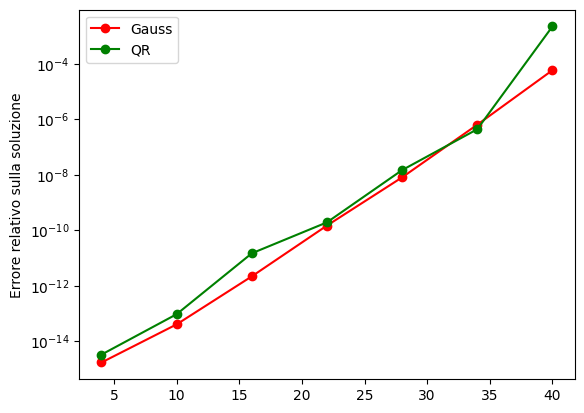

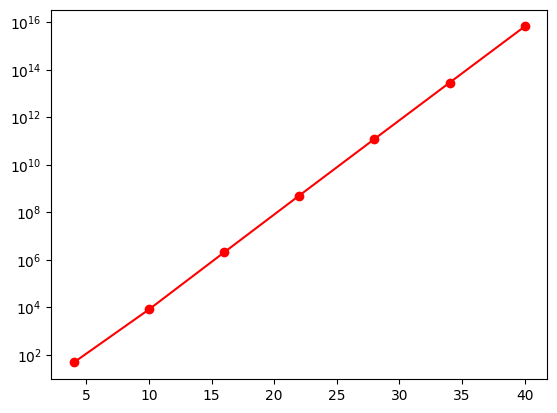

In [15]:
def Hankel(n):
    A = np.zeros((n, n), dtype=float)
    for i in range(n):
        for k in range(i + 1 - n, i + 1):
            if k > 0:
                A[i, n-1+k-i] = 2.0**(k+1)
            else:
                A[i, n-1+k-1] = 2.0**(1 / (2 - k -1))
    return A

indCond = []
err_rel = []
err_rel_qr = []
inter = range(4, 41, 6)

for n in inter:
    A = Hankel(n)
    indCond.append(npl.cond(A, 2))
    xes = np.ones((n, 1))
    b = np.dot(A, xes)

    PT, L, U = spl.lu(A)
    P = PT.T.copy()
    x, flag = LUsolve(P, A, L, U, b)
    err_rel.append(npl.norm(x - xes, 2) / npl.norm(xes, 2))

    Q, R = spl.qr(A)
    y = np.dot(Q.T, b)
    xqr, flag = Usolve(R, y)
    err_rel_qr.append(npl.norm(xqr - xes, 2) / npl.norm(xes, 2))

plt.semilogy(inter, err_rel, 'ro-', inter, err_rel_qr, 'go-')
plt.legend(['Gauss', 'QR'])
plt.ylabel('Errore relativo sulla soluzione')
plt.show()
plt.semilogy(inter,indCond,'ro-')


Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?


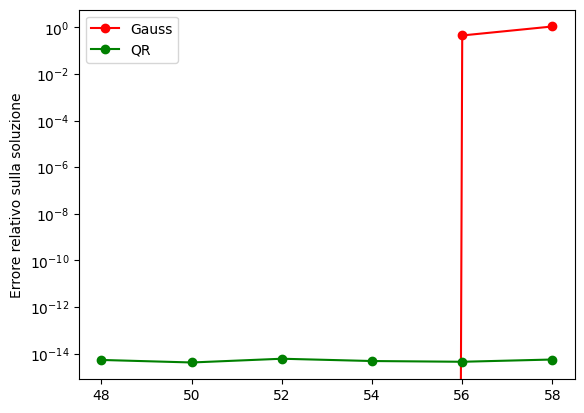

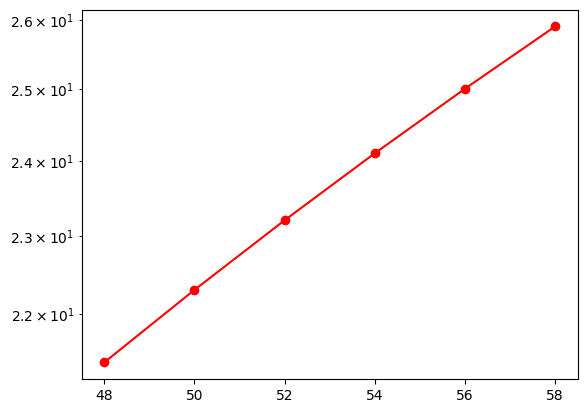

In [16]:
def matrix(n):
    A = np.zeros((n, n), dtype=float)
    for i in range(n):
        for j in range(n):
            if (i == j or j == n-1):
                A[i, j] = 1
            elif i > j:
                A[i, j] = -1
            else:
                A[i, j] = 0

    return A

indCond = []
err_rel = []
err_rel_qr = []
inter = range(48, 59, 2)

for n in inter:
    A = matrix(n)
    xes = np.ones((n, 1))
    b = A @ xes
    indCond.append(npl.cond(A, 2))

    PT, L, U = spl.lu(A)
    P = PT.T.copy()
    x, flag = LUsolve(P, A, L, U, b)
    err_rel.append(npl.norm(x - xes, 2) / npl.norm(xes, 2))

    Q, R = spl.qr(A)
    y = np.dot(Q.T, b)
    xqr, flag = Usolve(R, y)
    err_rel_qr.append(npl.norm(xqr - xes, 2) / npl.norm(xes, 2))

plt.semilogy(inter, err_rel, 'ro-', inter, err_rel_qr, 'go-')
plt.legend(['Gauss', 'QR'])
plt.ylabel('Errore relativo sulla soluzione')
plt.show()
plt.semilogy(inter,indCond,'ro-')  

## Esercizio 7
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente l'errore tra due iterazioni successive $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta


Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [17]:
def jacobi(A, b, x0, toll, itmax):
    err = toll
    x = []
    n = A.shape[0]

    M = np.diag(A)
    invM = np.diag(1 / M)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    N = -(E + F)
    T = invM @ N

    autoval = npl.eigvals(T)
    raggiospettrale = np.max(np.abs(autoval))
    print("raggio spettrale Jacobi: ", raggiospettrale)
    
    it = 0
    err_vet = []
    while it <= itmax and err >= toll:
        x = (b + np.dot(N, x0)) / M.reshape(n, 1)
        err = npl.norm(x - x0) / npl.norm(x)
        err_vet.append(err)
        x0 = x.copy()
        it += 1

    return x, it, err_vet

## Esercizio 8
Implementare la  funzione $gauss$_$seidel(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente l'errore tra due iterazioni successive $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [18]:
def gauss_seidel(A, b, x0, toll, itmax):
    err = toll
    x = []
    n = A.shape[0]

    D = np.diag(A)
    D = np.diag(D)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    M = E + D
    N = -F
    invM = npl.inv(M)
    T = np.dot(invM, N)
    
    autoval = npl.eigvals(T)
    raggiospettrale = np.max(np.abs(autoval))
    print("raggio spettrale Gauss-Seidel: ", raggiospettrale)

    it = 0
    err_vet = []
    while it <= itmax and err >= toll:
        t = b - np.dot(F, x0)
        x, flag = Lsolve(M, t)
        err = npl.norm(x - x0) / npl.norm(x)
        err_vet.append(err)
        x0 = x.copy()
        it += 1

    return x, it, err_vet

## Esercizio 9
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei - sistemai lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0])

[[ 4  1  3]
 [ 3  4  1]
 [ 1  1 17]]
raggio spettrale Jacobi:  0.5586853131416272
sol=
  [[1.]
 [1.]
 [1.]] 
 it  35
raggio spettrale Gauss-Seidel:  0.19431515030791588
sol=
  [[1.]
 [1.]
 [1.]] 
 it  13


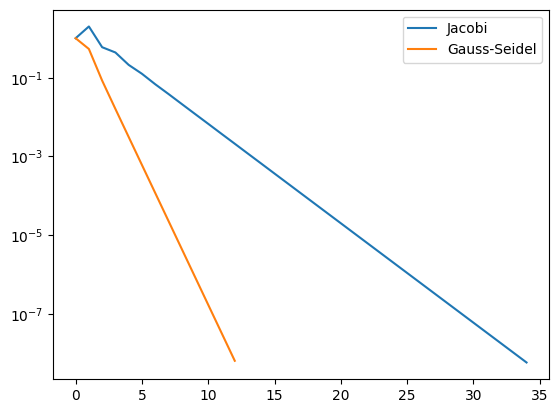

In [19]:
A=np.array([[4,1,3],[3,4,1],[1,1,17]])
m, n = A.shape
print(A)
#A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
#A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])
b = np.sum(A, axis=1).reshape(m, 1)
toll = 1e-8
itmax = 500
x0 = np.zeros(m).reshape(m, 1)
sol, it, err_vet = jacobi(A, b, x0, toll, itmax)
plt.semilogy(np.arange(it), err_vet)
print("sol=\n ",sol,"\n it ",it)

sol, it, err_vet = gauss_seidel(A, b, x0, toll, itmax)
print("sol=\n ",sol,"\n it ",it)
plt.semilogy(np.arange(it), err_vet)
plt.legend(['Jacobi', 'Gauss-Seidel'])
plt.show()


## Esercizio 10
Implementare la  funzione $gauss$_$seidel$_sor(A,b,x0,omega, toll,itmax) per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente l'errore tra due iterazioni successive $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [26]:
def gauss_seidel_sor(A, b, x0, omega, toll, itmax):
    err = toll
    x = []
    n = A.shape[0]

    D = np.diag(A)
    D = np.diag(D)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    Momega = npl.inv(D + (omega * E))
    Nomega = ((1 - omega) * D) - (omega * F)
    T = np.dot(Momega, Nomega)
    
    autoval = npl.eigvals(T)
    raggiospettrale = np.max(np.abs(autoval))
    print("raggio spettrale Gauss-Seidel: ", raggiospettrale)

    M = E + D
    N = -F

    it = 0
    err_vet = []
    xold = x0.copy()
    xnew = x0.copy()
    while it <= itmax and err >= toll:
        t = b - np.dot(F, xold)
        xtilde, flag = Lsolve(M, t)
        xnew = (1 - omega) * xold + omega * xtilde
        err = npl.norm(xnew - xold) / npl.norm(xnew)
        err_vet.append(err)
        xold = xnew.copy()
        it += 1

    return x, it, err_vet

raggio spettrale Gauss-Seidel:  0.8745350604104057
sol=
  [] 
 it  102


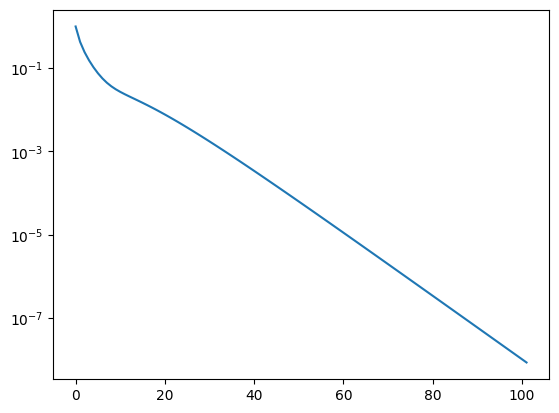

In [29]:
A=np.array([[4,1,3],[3,4,1],[1,1,17]])
m, n = A.shape
b = np.sum(A, axis=1).reshape(m, 1)
toll = 1e-8
itmax = 500
x0 = np.zeros(m).reshape(m, 1)
sol, it, err_vet = gauss_seidel_sor(A, b, x0, 0.2, toll, itmax)
plt.semilogy(np.arange(it), err_vet)
print("sol=\n ",sol,"\n it ",it)

## Esercizio 11
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

In [38]:
def creaPoisson(n):
    A = np.zeros((n, n))
    d = np.ones((n,)) * 4
    e = -np.ones((n-1,))
    f = -np.ones((n-3,))
    A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1) + np.diag(f, k=3) + np.diag(f, k=-3)
    return A
print(creaPoisson(10))

[[ 4. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  4. -1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  4. -1.  0. -1.  0.  0.  0.  0.]
 [-1.  0. -1.  4. -1.  0. -1.  0.  0.  0.]
 [ 0. -1.  0. -1.  4. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  4. -1.  0. -1.  0.]
 [ 0.  0.  0. -1.  0. -1.  4. -1.  0. -1.]
 [ 0.  0.  0.  0. -1.  0. -1.  4. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  4. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0. -1.  4.]]


## Esercizio 12
Implementare una funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente la
  norma del residuo iterazione per iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $norm(r(k),2) < toll$

## Esercizio 13
Testare il metodo del gradiente sull'esempio dell'esercizio 11